In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Train Datasets

In [3]:
demo = pd.read_csv('/content/Train_Demographics.csv')

In [4]:
demo.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India


In [5]:
demo.shape

(28836, 10)

In [6]:
claim = pd.read_csv('/content/Train_Claim.csv')

In [7]:
claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10000,2015-02-03,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City1,Location 1311,17,3,?,1,0,?,65501,13417,6071,46013
1,Cust10001,2015-02-02,Multi-vehicle Collision,Side Collision,Total Loss,Police,State7,City5,Location 1311,10,3,YES,2,1,YES,61382,15560,5919,39903
2,Cust10002,2015-01-15,Single Vehicle Collision,Side Collision,Minor Damage,Other,State8,City6,Location 2081,22,1,YES,2,3,NO,66755,11630,11630,43495
3,Cust10003,2015-01-19,Single Vehicle Collision,Side Collision,Minor Damage,Other,State9,City6,Location 2081,22,1,YES,2,3,NO,66243,12003,12003,42237
4,Cust10004,2015-01-09,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State8,City6,Location 1695,10,1,NO,2,1,YES,53544,8829,7234,37481


In [8]:
claim.shape

(28836, 19)

In [9]:
policy = pd.read_csv('/content/Train_Policy.csv')

In [10]:
policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110122,328,2014-10-17,State3,250/500,1000,1406.91,0,husband,Cust1001
1,110125,256,1990-05-25,State1,250/500,2000,1415.74,6000000,unmarried,Cust1004
2,110126,228,2014-06-06,State1,500/1000,1000,1583.91,6000000,unmarried,Cust1005
3,110127,256,2006-10-12,State3,250/500,1000,1351.10,0,unmarried,Cust1006
4,110128,137,2000-06-04,State2,250/500,1000,1333.35,0,husband,Cust1007


In [11]:
policy.shape

(28836, 10)

In [12]:
vec = pd.read_csv('/content/Train_Vehicle.csv')

In [13]:
vec.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust20179,VehicleID,Vehicle8898
1,Cust21384,VehicleModel,Malibu
2,Cust33335,VehicleMake,Toyota
3,Cust27118,VehicleModel,Neon
4,Cust13038,VehicleID,Vehicle30212


In [14]:
vec = vec.set_index(['CustomerID','VehicleAttribute'], drop=True).unstack('VehicleAttribute')

In [15]:
vec.shape

(28836, 4)

In [16]:
fraud = pd.read_csv('/content/Traindata_with_Target.csv')

In [17]:
fraud.head()

,CustomerID,ReportedFraud
0,Cust20065,N
1,Cust37589,N
2,Cust24312,N
3,Cust5493,Y
4,Cust7704,Y


In [18]:
fraud.shape

(28836, 2)

# Mergeing Datasets

In [19]:
# merge the datasets on a common variable
dc_df = pd.merge(demo,claim, on='CustomerID')


In [20]:
pv_df = pd.merge(policy,vec, on='CustomerID')


<ipython-input-20-6bfcc25a1a3d>:1: FutureWarning: merging between different levels is deprecated and will be removed in a future version. (1 levels on the left, 2 on the right)
  pv_df = pd.merge(policy,vec, on='CustomerID')


In [21]:
fd_df = pd.merge(dc_df,pv_df,on='CustomerID' )

In [22]:
train_df =  pd.merge(fd_df,fraud,on='CustomerID' )

In [23]:
train_df.columns

Index([                               'CustomerID',
                                      'InsuredAge',
                                  'InsuredZipCode',
                                   'InsuredGender',
                           'InsuredEducationLevel',
                               'InsuredOccupation',
                                  'InsuredHobbies',
                                    'CapitalGains',
                                     'CapitalLoss',
                                         'Country',
                                  'DateOfIncident',
                                  'TypeOfIncident',
                                'TypeOfCollission',
                              'SeverityOfIncident',
                            'AuthoritiesContacted',
                                   'IncidentState',
                                    'IncidentCity',
                                 'IncidentAddress',
                                    'IncidentTime',
            

In [24]:
train_df.to_csv('Train_df',index=False)

##  2.1 Preprocessing Merged Data

In [25]:
trained_df = pd.read_csv('/content/Train_df')

In [26]:
trained_df.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,"('VehicleAttributeDetails', 'VehicleID')","('VehicleAttributeDetails', 'VehicleMake')","('VehicleAttributeDetails', 'VehicleModel')","('VehicleAttributeDetails', 'VehicleYOM')",ReportedFraud
0,Cust10000,35,454776,MALE,JD,armed-forces,movies,56700,-48500,India,...,100/300,1000,1632.73,0,not-in-family,Vehicle26917,Audi,A5,2008,N
1,Cust10001,36,454776,MALE,JD,tech-support,cross-fit,70600,-48500,India,...,100/300,1000,1255.19,0,not-in-family,Vehicle15893,Audi,A5,2006,N
2,Cust10002,33,603260,MALE,JD,armed-forces,polo,66400,-63700,India,...,500/1000,617,1373.38,0,wife,Vehicle5152,Volkswagen,Jetta,1999,N
3,Cust10003,36,474848,MALE,JD,armed-forces,polo,47900,-73400,India,...,500/1000,722,1337.60,0,own-child,Vehicle37363,Volkswagen,Jetta,2003,N
4,Cust10004,29,457942,FEMALE,High School,exec-managerial,dancing,0,-41500,India,...,100/300,500,1353.73,4279863,unmarried,Vehicle28633,Toyota,CRV,2010,N


In [27]:
trained_df.tail()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,"('VehicleAttributeDetails', 'VehicleID')","('VehicleAttributeDetails', 'VehicleMake')","('VehicleAttributeDetails', 'VehicleModel')","('VehicleAttributeDetails', 'VehicleYOM')",ReportedFraud
28831,Cust9993,46,600561,MALE,Masters,protective-serv,sleeping,0,0,India,...,500/1000,655,1276.01,0,unmarried,Vehicle13568,Suburu,Impreza,2007,N
28832,Cust9994,44,439304,MALE,Masters,adm-clerical,dancing,0,-28800,India,...,100/300,1089,1273.38,0,unmarried,Vehicle19810,Jeep,Wrangler,2003,N
28833,Cust9996,53,460722,MALE,PhD,transport-moving,base-jumping,63100,-43800,India,...,250/500,787,1380.92,3448735,own-child,Vehicle3339,Suburu,Legacy,2004,N
28834,Cust9997,53,472634,MALE,Associate,transport-moving,skydiving,67400,-43800,India,...,250/500,780,1389.29,3364301,not-in-family,Vehicle10240,Suburu,Forrestor,2004,N
28835,Cust9999,36,450730,FEMALE,PhD,handlers-cleaners,base-jumping,46400,-74300,India,...,500/1000,2000,928.43,2909175,husband,Vehicle39163,Suburu,E400,2007,N


In [28]:
trained_df.shape

(28836, 42)

In [29]:
trained_df.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,"('VehicleAttributeDetails', 'VehicleYOM')"
count,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,28836.000000,2.883600e+04,28836.000000
mean,38.815370,502436.579068,23066.569566,-24940.612429,11.746047,1.823207,0.985782,7337.118428,7283.870197,37687.129387,129312.517097,203.067867,1114.282529,1255.528382,9.836680e+05,2005.093113
std,7.996377,72250.868871,27637.813724,27913.209608,6.170069,0.980099,0.784764,4427.638593,4375.842738,17977.048232,11114.060267,99.932951,546.632816,223.013899,1.969282e+06,5.309956
min,19.000000,430104.000000,0.000000,-111100.000000,-5.000000,1.000000,0.000000,0.000000,0.000000,109.000000,110122.000000,1.000000,500.000000,-1.000000,-1.000000e+06,1995.000000
25%,33.000000,448603.000000,0.000000,-50000.000000,6.000000,1.000000,0.000000,4743.750000,4862.000000,32193.250000,119698.750000,126.000000,622.000000,1122.007500,0.000000e+00,2001.000000
50%,38.000000,466691.000000,0.000000,0.000000,12.000000,1.000000,1.000000,7147.000000,7051.000000,42457.500000,129278.500000,199.000000,1000.000000,1265.205000,0.000000e+00,2005.000000
75%,44.000000,603848.000000,49000.000000,0.000000,17.000000,3.000000,2.000000,10571.250000,10327.000000,49535.750000,138933.250000,267.000000,1627.000000,1396.605000,4.859610e+05,2010.000000
max,64.000000,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,21450.000000,23670.000000,79560.000000,148619.000000,479.000000,2000.000000,2047.590000,1.000000e+07,2015.000000


In [30]:
trained_df.columns

Index(['CustomerID', 'InsuredAge', 'InsuredZipCode', 'InsuredGender',
       'InsuredEducationLevel', 'InsuredOccupation', 'InsuredHobbies',
       'CapitalGains', 'CapitalLoss', 'Country', 'DateOfIncident',
       'TypeOfIncident', 'TypeOfCollission', 'SeverityOfIncident',
       'AuthoritiesContacted', 'IncidentState', 'IncidentCity',
       'IncidentAddress', 'IncidentTime', 'NumberOfVehicles', 'PropertyDamage',
       'BodilyInjuries', 'Witnesses', 'PoliceReport', 'AmountOfTotalClaim',
       'AmountOfInjuryClaim', 'AmountOfPropertyClaim', 'AmountOfVehicleDamage',
       'InsurancePolicyNumber', 'CustomerLoyaltyPeriod',
       'DateOfPolicyCoverage', 'InsurancePolicyState',
       'Policy_CombinedSingleLimit', 'Policy_Deductible',
       'PolicyAnnualPremium', 'UmbrellaLimit', 'InsuredRelationship',
       '('VehicleAttributeDetails', 'VehicleID')',
       '('VehicleAttributeDetails', 'VehicleMake')',
       '('VehicleAttributeDetails', 'VehicleModel')',
       '('VehicleAttributeD

In [31]:
# Define a list of special missing value representations
special_missing_values = ["?", "MISSINGVAL", "NA", "-1", "-5", "MISSINGVALUE", "MISSEDDATA", "???"]

# Replace all instances of special missing values with NaN
trained_df.replace(special_missing_values, np.nan, inplace=True)

# Count the number of missing values in each column
missing_values_count = trained_df.isna().sum()

# Calculate the percentage of missing values in each column
percent_missing = (missing_values_count / len(trained_df)) * 100

# Create a new DataFrame to store the missing value information
missing_info = pd.DataFrame({
    "Total Missing": missing_values_count,
    "Percent Missing": percent_missing
})

print("Missing Value Information:")
print(missing_info)


Missing Value Information:
                                             Total Missing  Percent Missing
CustomerID                                               0         0.000000
InsuredAge                                               0         0.000000
InsuredZipCode                                           0         0.000000
InsuredGender                                           30         0.104037
InsuredEducationLevel                                    0         0.000000
InsuredOccupation                                        0         0.000000
InsuredHobbies                                           0         0.000000
CapitalGains                                             0         0.000000
CapitalLoss                                              0         0.000000
Country                                                  2         0.006936
DateOfIncident                                           0         0.000000
TypeOfIncident                                           0   

In [32]:
trained_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28836 entries, 0 to 28835
Data columns (total 42 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   CustomerID                                   28836 non-null  object 
 1   InsuredAge                                   28836 non-null  int64  
 2   InsuredZipCode                               28836 non-null  int64  
 3   InsuredGender                                28806 non-null  object 
 4   InsuredEducationLevel                        28836 non-null  object 
 5   InsuredOccupation                            28836 non-null  object 
 6   InsuredHobbies                               28836 non-null  object 
 7   CapitalGains                                 28836 non-null  int64  
 8   CapitalLoss                                  28836 non-null  int64  
 9   Country                                      28834 non-null  object 
 10

In [33]:
# Replace missing values with the most common value for each column
for col in trained_df.columns:
    if trained_df[col].dtype == 'object':
        trained_df[col].fillna(trained_df[col].mode()[0], inplace=True)
    else:
        trained_df[col].fillna(trained_df[col].median(), inplace=True)


In [34]:
# Define a list of special missing value representations
special_missing_values = ["?", "MISSINGVAL", "NA", "-1", "-5", "MISSINGVALUE", "MISSEDDATA", "???"]

# Replace all instances of special missing values with NaN
trained_df.replace(special_missing_values, np.nan, inplace=True)

# Count the number of missing values in each column
missing_values_count = trained_df.isna().sum()

# Calculate the percentage of missing values in each column
percent_missing = (missing_values_count / len(trained_df)) * 100

# Create a new DataFrame to store the missing value information
missing_info = pd.DataFrame({
    "Total Missing": missing_values_count,
    "Percent Missing": percent_missing
})

print("Missing Value Information:")
print(missing_info)


Missing Value Information:
                                             Total Missing  Percent Missing
CustomerID                                               0              0.0
InsuredAge                                               0              0.0
InsuredZipCode                                           0              0.0
InsuredGender                                            0              0.0
InsuredEducationLevel                                    0              0.0
InsuredOccupation                                        0              0.0
InsuredHobbies                                           0              0.0
CapitalGains                                             0              0.0
CapitalLoss                                              0              0.0
Country                                                  0              0.0
DateOfIncident                                           0              0.0
TypeOfIncident                                           0   

In [35]:
trained_df.dtypes


CustomerID                                      object
InsuredAge                                       int64
InsuredZipCode                                   int64
InsuredGender                                   object
InsuredEducationLevel                           object
InsuredOccupation                               object
InsuredHobbies                                  object
CapitalGains                                     int64
CapitalLoss                                      int64
Country                                         object
DateOfIncident                                  object
TypeOfIncident                                  object
TypeOfCollission                                object
SeverityOfIncident                              object
AuthoritiesContacted                            object
IncidentState                                   object
IncidentCity                                    object
IncidentAddress                                 object
IncidentTi

In [36]:
numerical_cols = trained_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = trained_df.select_dtypes(include='object').columns.tolist()

print("Numerical columns:")
for col in numerical_cols:
    print(f"{col} ({trained_df[col].dtype})")

print("\nCategorical columns:")
for col in categorical_cols:
    print(f"{col} ({trained_df[col].dtype})")


Numerical columns:
InsuredAge (int64)
InsuredZipCode (int64)
CapitalGains (int64)
CapitalLoss (int64)
IncidentTime (int64)
NumberOfVehicles (int64)
BodilyInjuries (int64)
AmountOfInjuryClaim (int64)
AmountOfPropertyClaim (int64)
AmountOfVehicleDamage (int64)
InsurancePolicyNumber (int64)
CustomerLoyaltyPeriod (int64)
Policy_Deductible (int64)
PolicyAnnualPremium (float64)
UmbrellaLimit (int64)
('VehicleAttributeDetails', 'VehicleYOM') (int64)

Categorical columns:
CustomerID (object)
InsuredGender (object)
InsuredEducationLevel (object)
InsuredOccupation (object)
InsuredHobbies (object)
Country (object)
DateOfIncident (object)
TypeOfIncident (object)
TypeOfCollission (object)
SeverityOfIncident (object)
AuthoritiesContacted (object)
IncidentState (object)
IncidentCity (object)
IncidentAddress (object)
PropertyDamage (object)
Witnesses (object)
PoliceReport (object)
AmountOfTotalClaim (object)
DateOfPolicyCoverage (object)
InsurancePolicyState (object)
Policy_CombinedSingleLimit (object

In [37]:
# Select categorical columns (object data type)
cat_cols = trained_df.select_dtypes(include=["object"])

# Loop through each categorical column and print unique values
for col in cat_cols:
    print(f"Unique values for column '{col}':")
    print(trained_df[col].unique())
    print()

Unique values for column 'CustomerID':
['Cust10000' 'Cust10001' 'Cust10002' ... 'Cust9996' 'Cust9997' 'Cust9999']

Unique values for column 'InsuredGender':
['MALE' 'FEMALE']

Unique values for column 'InsuredEducationLevel':
['JD' 'High School' 'Masters' 'MD' 'Associate' 'College' 'PhD']

Unique values for column 'InsuredOccupation':
['armed-forces' 'tech-support' 'exec-managerial' 'adm-clerical'
 'handlers-cleaners' 'craft-repair' 'prof-specialty' 'other-service'
 'priv-house-serv' 'protective-serv' 'farming-fishing' 'sales'
 'transport-moving' 'machine-op-inspct']

Unique values for column 'InsuredHobbies':
['movies' 'cross-fit' 'polo' 'dancing' 'sleeping' 'camping' 'golf'
 'paintball' 'base-jumping' 'yachting' 'basketball' 'hiking'
 'bungie-jumping' 'exercise' 'board-games' 'reading' 'skydiving'
 'video-games' 'kayaking' 'chess']

Unique values for column 'Country':
['India']

Unique values for column 'DateOfIncident':
['2015-02-03' '2015-02-02' '2015-01-15' '2015-01-19' '2015-01-0

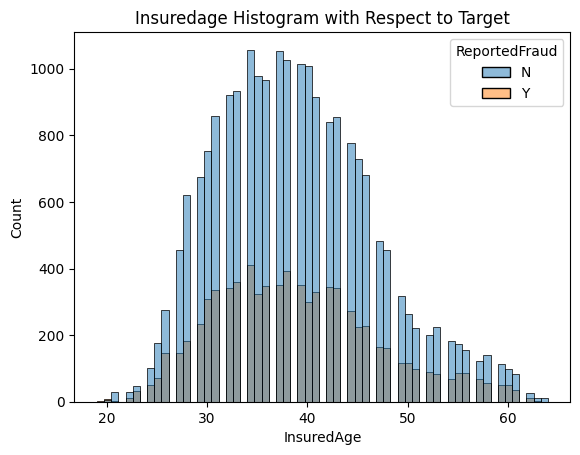

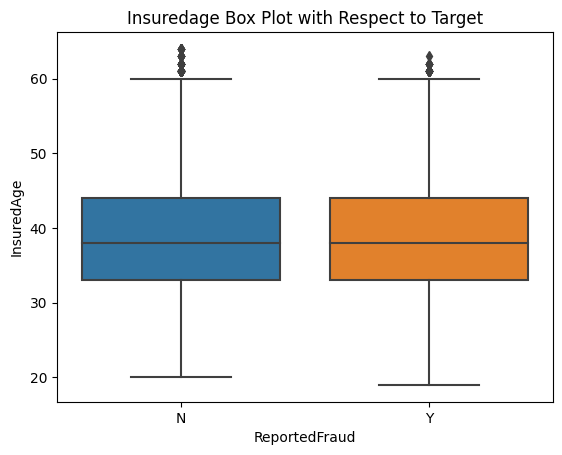

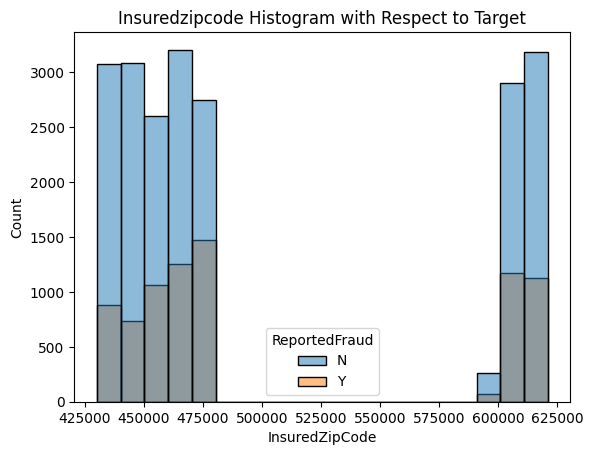

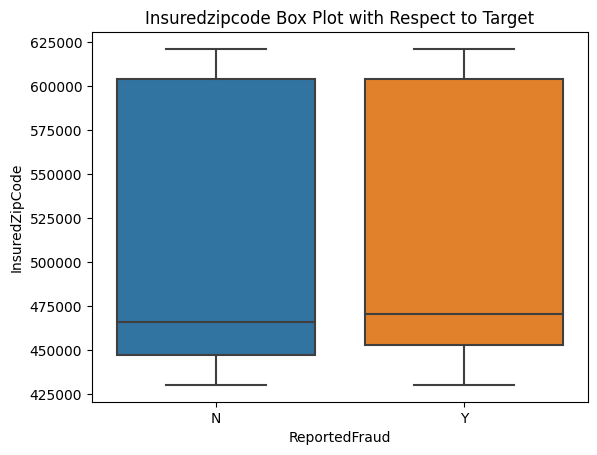

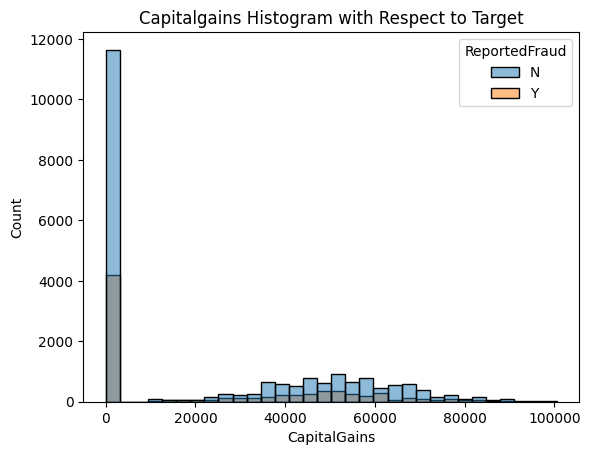

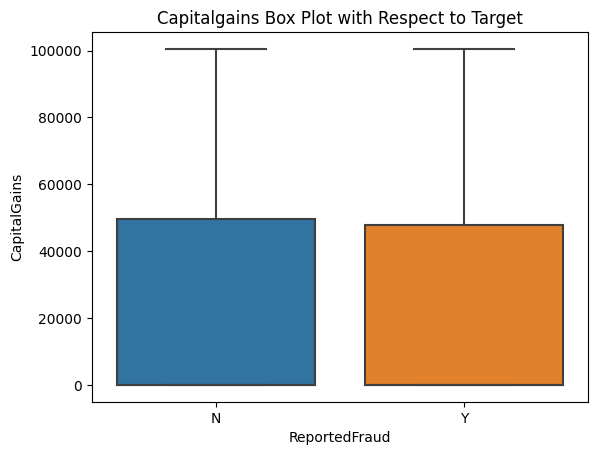

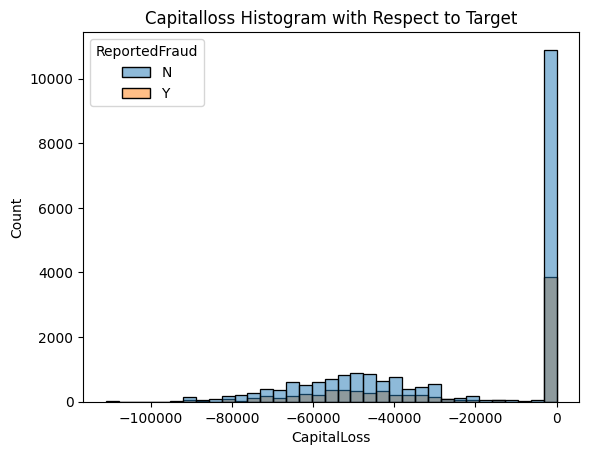

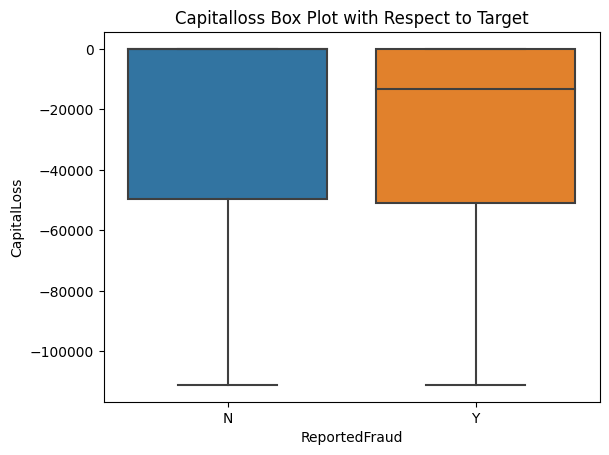

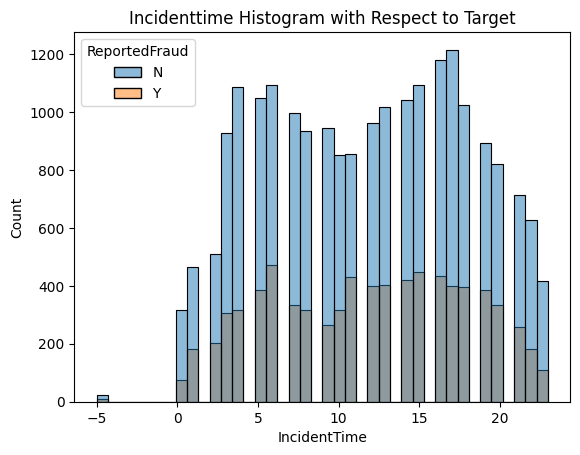

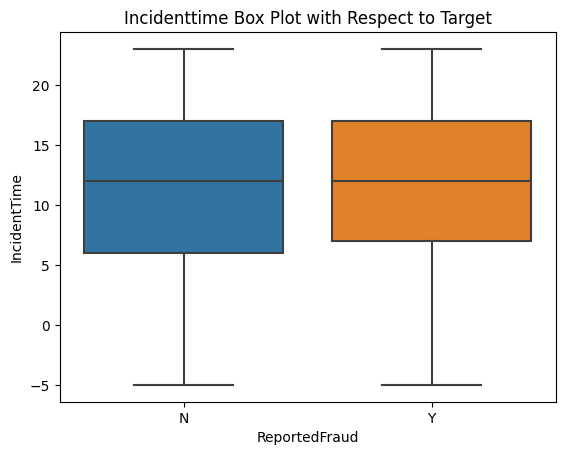

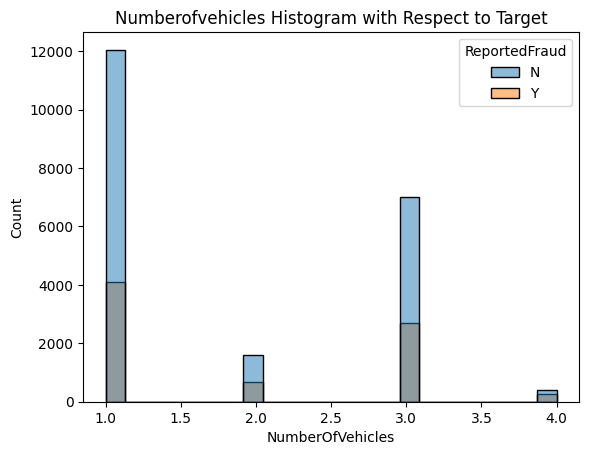

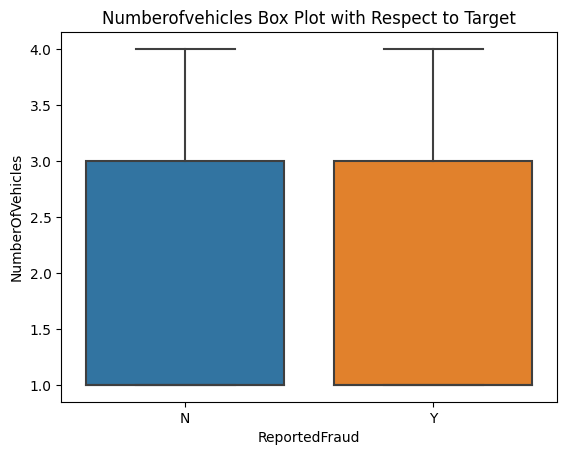

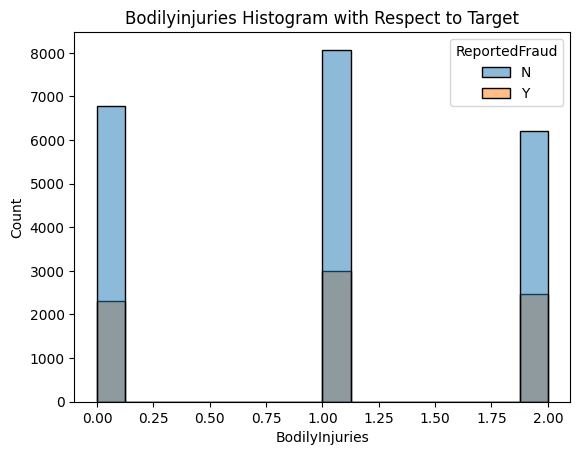

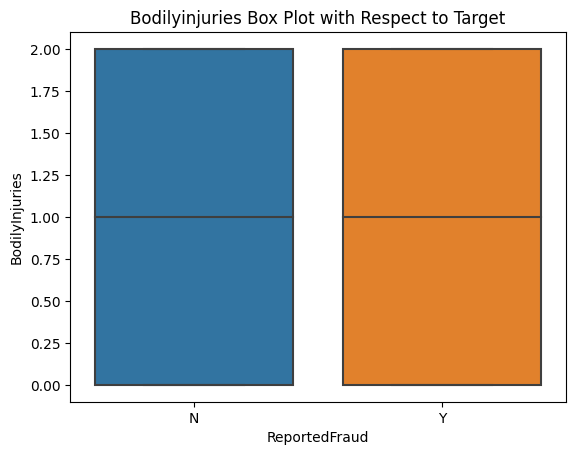

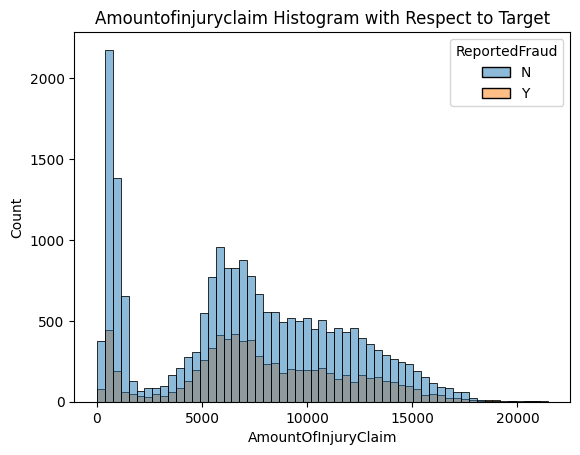

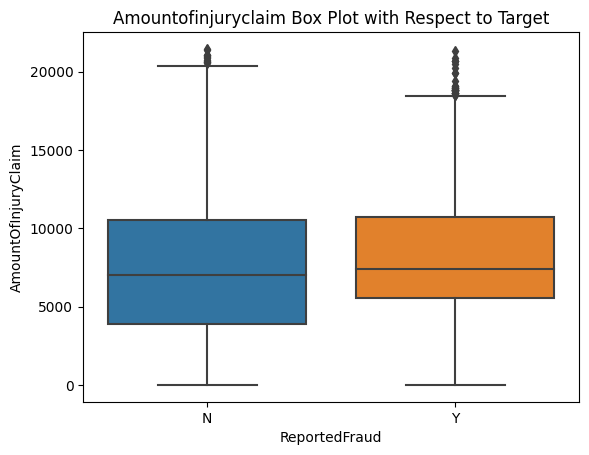

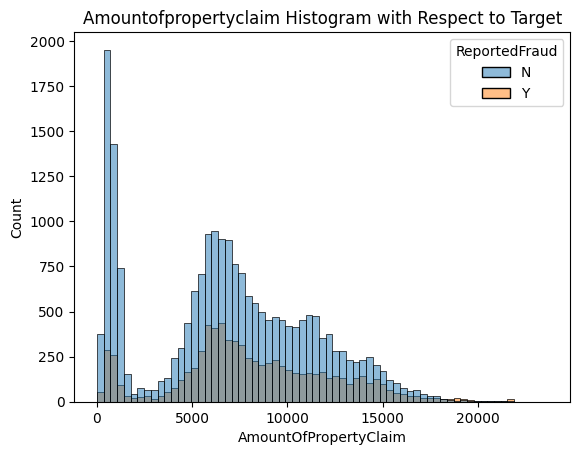

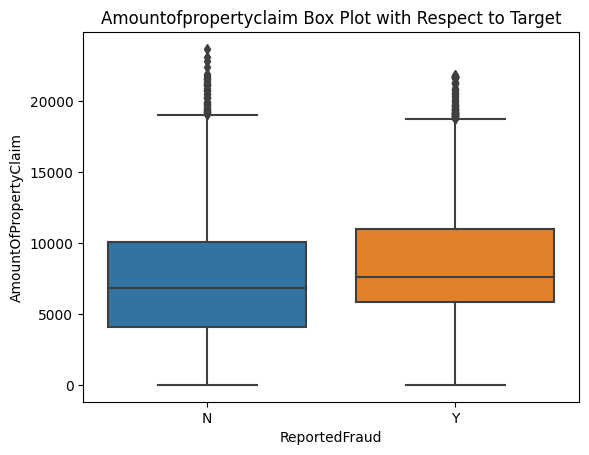

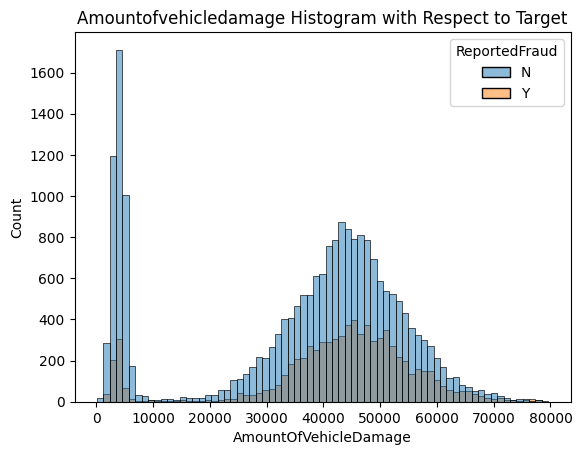

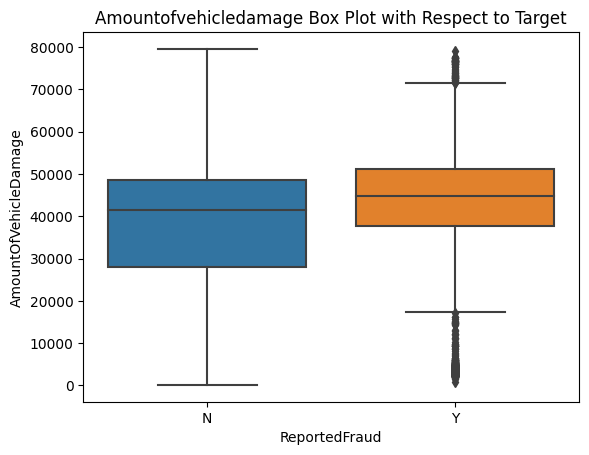

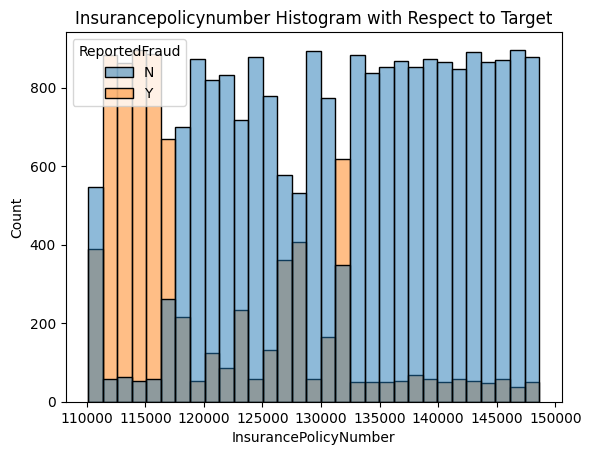

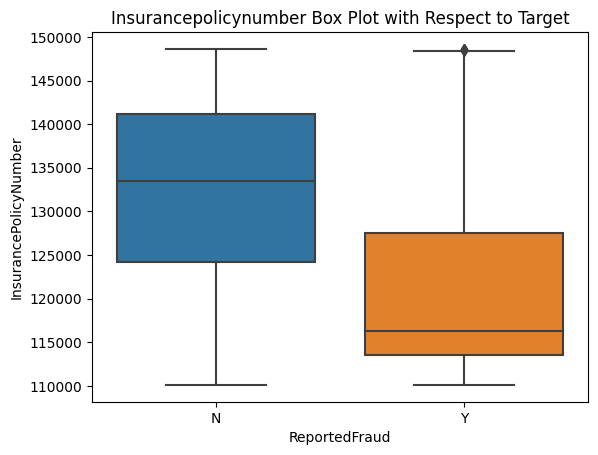

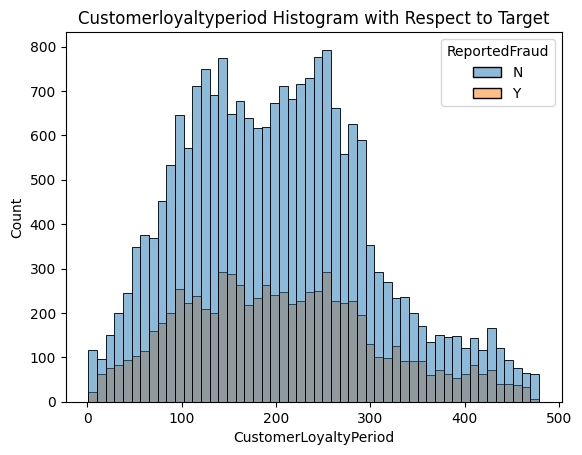

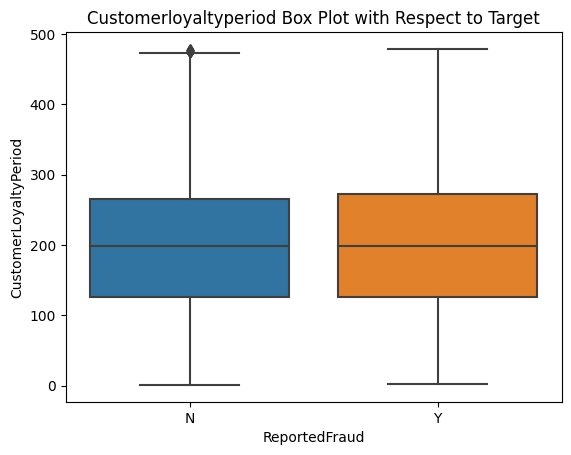

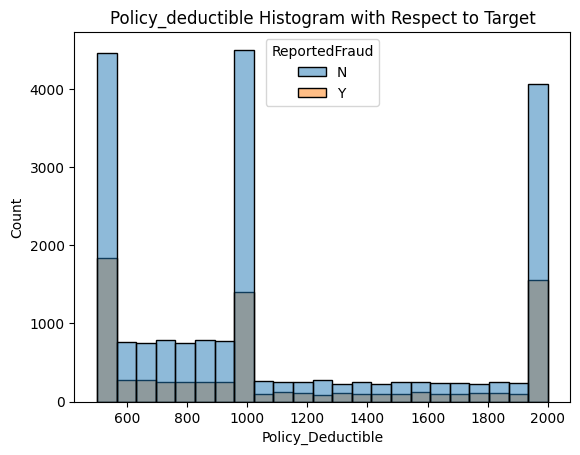

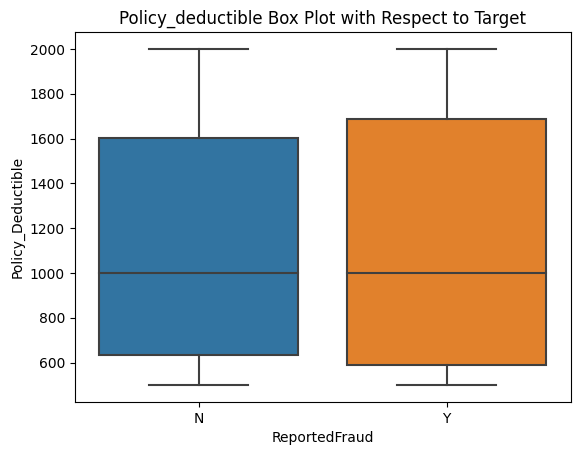

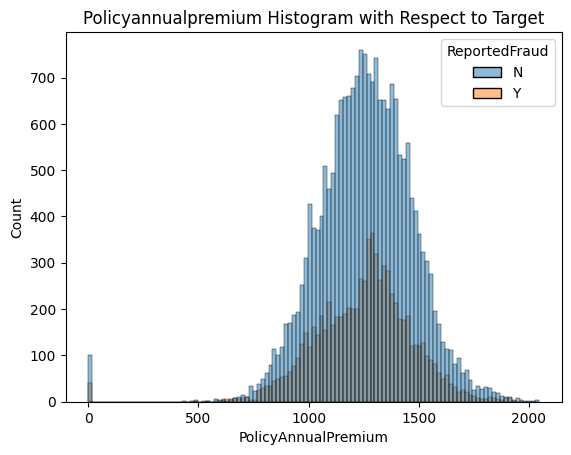

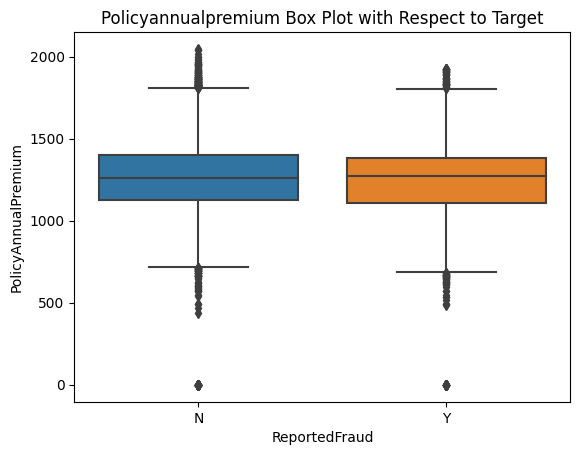

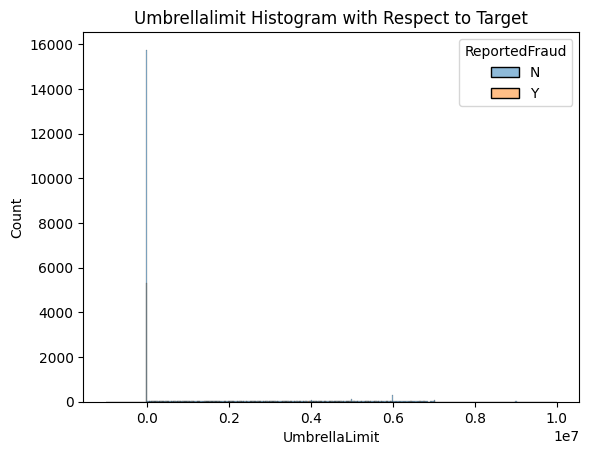

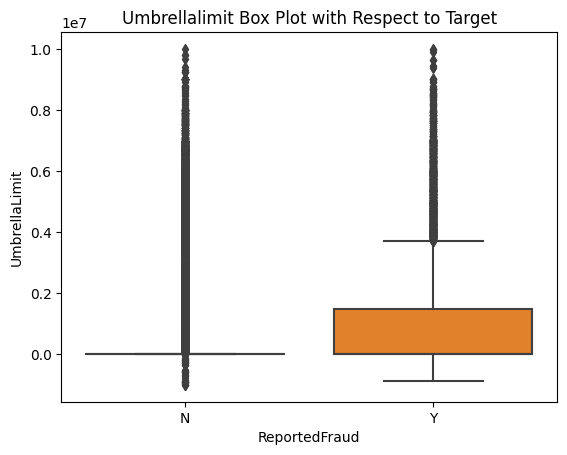

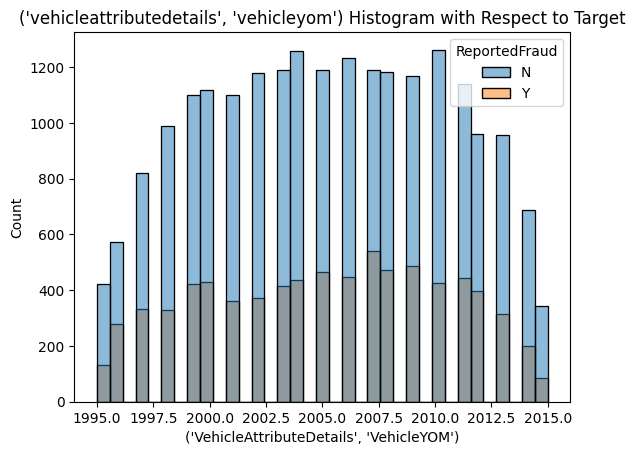

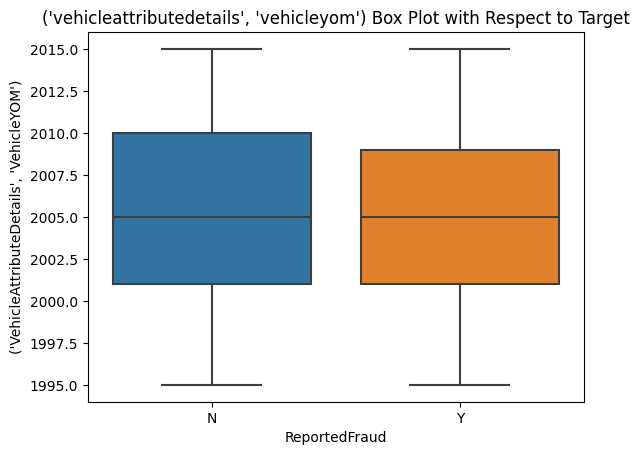

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# Loop through all columns except the target column
for col in trained_df.drop("ReportedFraud", axis=1).select_dtypes(include=['float', 'int']).columns:
    # Create histogram for the current column with respect to the target column
    sns.histplot(data=trained_df, x=col, hue="ReportedFraud")
    plt.title(f"{col.capitalize()} Histogram with Respect to Target")
    plt.show()

    # Create box plot for the current column with respect to the target column
    sns.boxplot(data=trained_df, x="ReportedFraud", y=col)
    plt.title(f"{col.capitalize()} Box Plot with Respect to Target")
    plt.show()


In [42]:
from sklearn.preprocessing import LabelEncoder

# select categorical columns
categorical_cols = trained_df.select_dtypes(include='object').columns.tolist()

# convert the categorical columns to string data type
trained_df[categorical_cols] = trained_df[categorical_cols].astype(str)

# apply label encoding to categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    trained_df[col] = encoder.fit_transform(trained_df[col])



In [43]:
trained_df.dtypes


CustomerID                                       int64
InsuredAge                                       int64
InsuredZipCode                                   int64
InsuredGender                                    int64
InsuredEducationLevel                            int64
InsuredOccupation                                int64
InsuredHobbies                                   int64
CapitalGains                                     int64
CapitalLoss                                      int64
Country                                          int64
DateOfIncident                                   int64
TypeOfIncident                                   int64
TypeOfCollission                                 int64
SeverityOfIncident                               int64
AuthoritiesContacted                             int64
IncidentState                                    int64
IncidentCity                                     int64
IncidentAddress                                  int64
IncidentTi

In [44]:
numerical_cols = trained_df.select_dtypes(include=np.number).columns.tolist()
print("Numerical columns:")
for col in numerical_cols:
    print(f"{col} ({trained_df[col].dtype})")

Numerical columns:
CustomerID (int64)
InsuredAge (int64)
InsuredZipCode (int64)
InsuredGender (int64)
InsuredEducationLevel (int64)
InsuredOccupation (int64)
InsuredHobbies (int64)
CapitalGains (int64)
CapitalLoss (int64)
Country (int64)
DateOfIncident (int64)
TypeOfIncident (int64)
TypeOfCollission (int64)
SeverityOfIncident (int64)
AuthoritiesContacted (int64)
IncidentState (int64)
IncidentCity (int64)
IncidentAddress (int64)
IncidentTime (int64)
NumberOfVehicles (int64)
PropertyDamage (int64)
BodilyInjuries (int64)
Witnesses (int64)
PoliceReport (int64)
AmountOfTotalClaim (int64)
AmountOfInjuryClaim (int64)
AmountOfPropertyClaim (int64)
AmountOfVehicleDamage (int64)
InsurancePolicyNumber (int64)
CustomerLoyaltyPeriod (int64)
DateOfPolicyCoverage (int64)
InsurancePolicyState (int64)
Policy_CombinedSingleLimit (int64)
Policy_Deductible (int64)
PolicyAnnualPremium (float64)
UmbrellaLimit (int64)
InsuredRelationship (int64)
('VehicleAttributeDetails', 'VehicleID') (int64)
('VehicleAttri

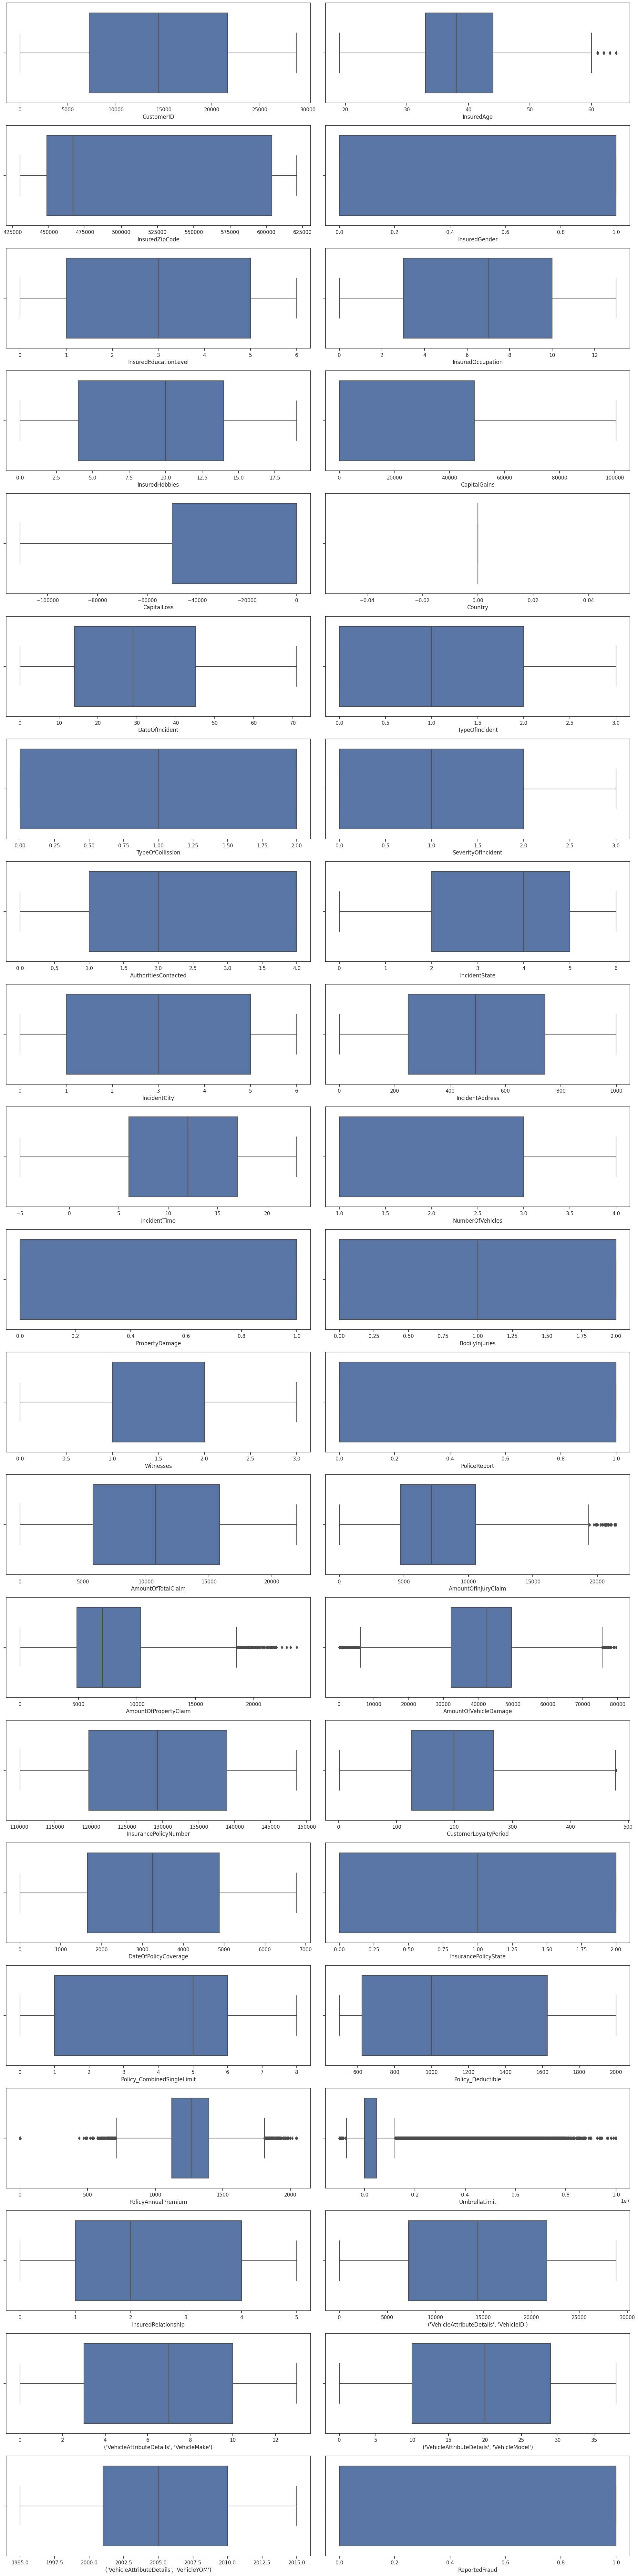

In [45]:
import math

sns.set(style="ticks")
num_cols = len(trained_df.columns)
rows = 21
cols = math.ceil(num_cols/rows)
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 80))

for i, col in enumerate(trained_df.columns):
    row_id = i // cols
    col_id = i % cols
    sns.boxplot(x=trained_df[col], ax=axes[row_id, col_id], orient='h')
    axes[row_id, col_id].set_xlabel(col)

plt.tight_layout()
plt.show()


In [46]:
# loop through each numeric column
for col in numerical_cols:
    # calculate the first quartile (Q1)
    q1 = trained_df[col].quantile(0.25)
    
    # calculate the third quartile (Q3)
    q3 = trained_df[col].quantile(0.75)
    
    # calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # calculate the lower and upper bounds for outliers
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # replace outliers with the median value of the column
    trained_df[col] = np.where((trained_df[col] < lower) | (trained_df[col] > upper), trained_df[col].median(), trained_df[col])

# loop through each numeric column
for col in numerical_cols:
    # calculate the first quartile (Q1)
    q1 = trained_df[col].quantile(0.25)
    
    # calculate the third quartile (Q3)
    q3 = trained_df[col].quantile(0.75)
    
    # calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # calculate the lower and upper bounds for outliers
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # identify and count the outliers
    outliers = trained_df[(trained_df[col] < lower) | (trained_df[col] > upper)]
    pct_outliers = len(outliers) / len(trained_df) * 100
    
    # print the percentage of outliers for the column
    print(f"{col} has {pct_outliers:.2f}% outliers")


CustomerID has 0.00% outliers
InsuredAge has 0.00% outliers
InsuredZipCode has 0.00% outliers
InsuredGender has 0.00% outliers
InsuredEducationLevel has 0.00% outliers
InsuredOccupation has 0.00% outliers
InsuredHobbies has 0.00% outliers
CapitalGains has 0.00% outliers
CapitalLoss has 0.00% outliers
Country has 0.00% outliers
DateOfIncident has 0.00% outliers
TypeOfIncident has 0.00% outliers
TypeOfCollission has 0.00% outliers
SeverityOfIncident has 0.00% outliers
AuthoritiesContacted has 0.00% outliers
IncidentState has 0.00% outliers
IncidentCity has 0.00% outliers
IncidentAddress has 0.00% outliers
IncidentTime has 0.00% outliers
NumberOfVehicles has 0.00% outliers
PropertyDamage has 0.00% outliers
BodilyInjuries has 0.00% outliers
Witnesses has 0.00% outliers
PoliceReport has 0.00% outliers
AmountOfTotalClaim has 0.00% outliers
AmountOfInjuryClaim has 0.00% outliers
AmountOfPropertyClaim has 0.07% outliers
AmountOfVehicleDamage has 5.14% outliers
InsurancePolicyNumber has 0.00% o

In [47]:
trained_df.shape

(28836, 42)

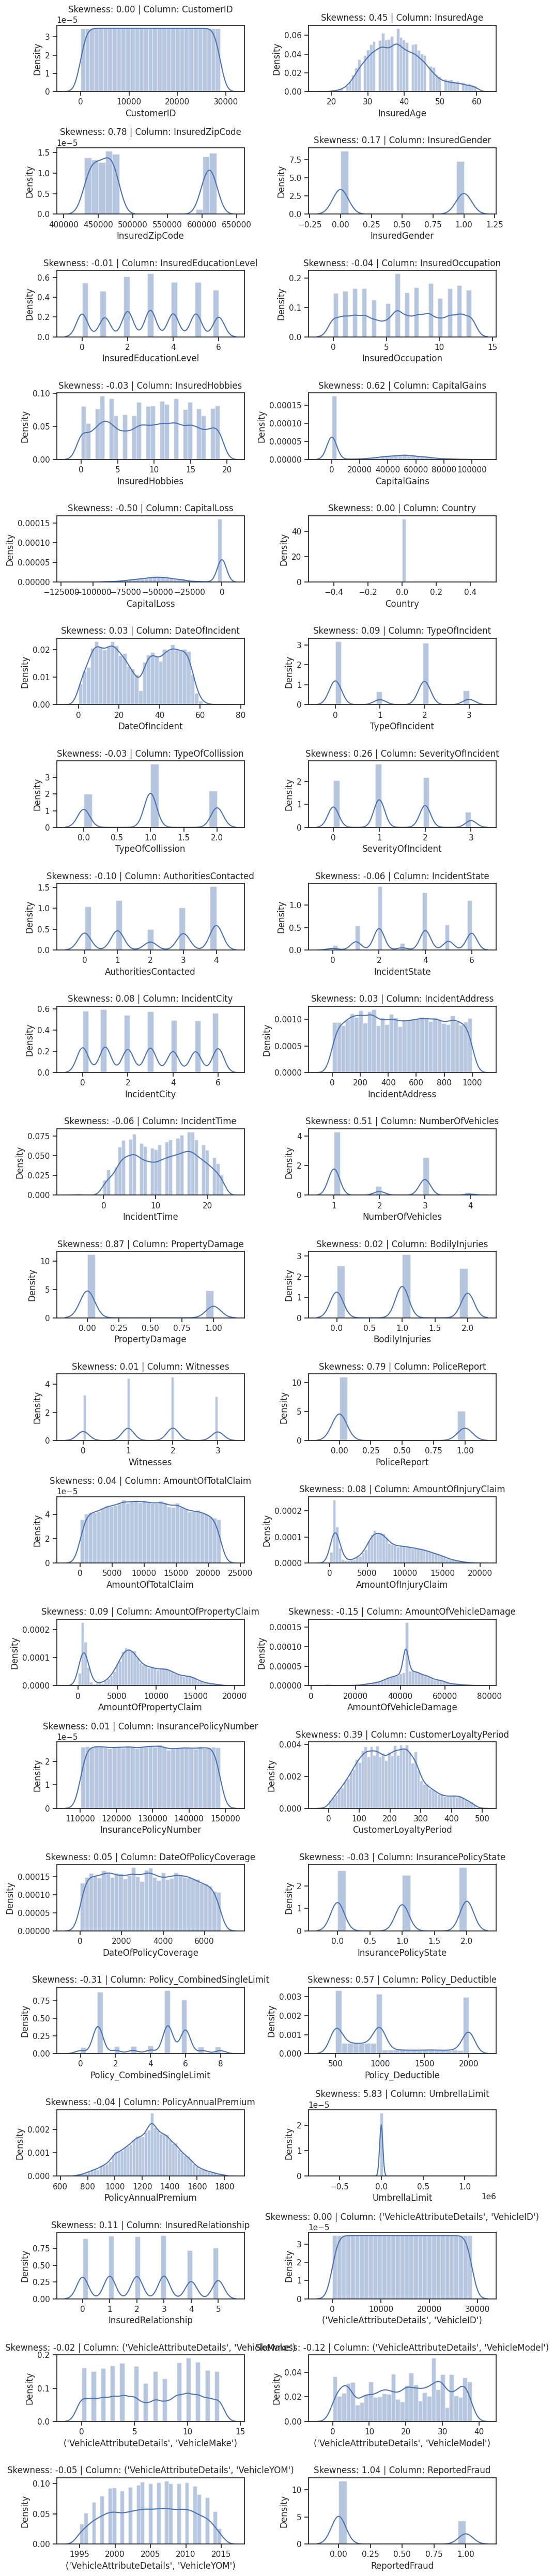

In [48]:
import warnings
warnings.filterwarnings('ignore')

# Get numeric columns in the dataset
numeric_cols = trained_df.select_dtypes(include=[np.number]).columns

# Create subplots
fig, axes = plt.subplots(nrows=21, ncols=2, figsize=(10, 50))

# Iterate over each numeric column and plot its distribution
for i, col in enumerate(numeric_cols):
    sns.distplot(trained_df[col], ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title("Skewness: {:.2f} | Column: {}".format(trained_df[col].skew(), col))

plt.tight_layout()
plt.show()


In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
X = trained_df.drop(["ReportedFraud"], axis = 1)
y = trained_df["ReportedFraud"]

sc = StandardScaler()
X_scaled = sc.fit_transform(X)
X_scaled

array([[-1.73199074, -0.47100636, -0.6596655 , ..., -1.36441017,
        -1.31136507,  0.54745044],
       [-1.73187061, -0.34273085, -0.6596655 , ..., -1.36441017,
        -1.31136507,  0.17079294],
       [-1.73175048, -0.72755738,  1.39548729, ...,  1.59522311,
         0.0328072 , -1.14750833],
       ...,
       [ 1.73175048,  1.83795284, -0.57736748, ...,  1.1019509 ,
         0.12241869, -0.20586457],
       [ 1.73187061,  1.83795284, -0.41249464, ...,  1.1019509 ,
        -0.41525022, -0.20586457],
       [ 1.73199074, -0.34273085, -0.7156658 , ...,  1.1019509 ,
        -0.68408468,  0.35912169]])

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import f1_score


In [54]:
model1 = RandomForestClassifier()
model1.fit(X_train, y_train)



RandomForestClassifier()

In [55]:
y_pred_train = model1.predict(X_train)
y_pred_test = model1.predict(X_test)


In [56]:
train_accuracy = model1.score(X_train, y_train)
test_accuracy = model1.score(X_test, y_test)

print("Training accuracy:", train_accuracy)
print("Test accuracy:", test_accuracy)


Training accuracy: 1.0
Test accuracy: 0.9300658883366085


In [57]:
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

DecisionTreeClassifier()

In [58]:
y_pred_train2 = model2.predict(X_train)
y_pred_test2 = model2.predict(X_test)


In [59]:
train_accuracy2 = model2.score(X_train, y_train)
test_accuracy2 = model2.score(X_test, y_test)

print("Training accuracy:", train_accuracy2)
print("Test accuracy:", test_accuracy2)


Training accuracy: 1.0
Test accuracy: 0.8771240319038262


In [60]:
model3 = KNeighborsClassifier()
model3.fit(X_train, y_train)

KNeighborsClassifier()

In [61]:
y_pred_train3 = model3.predict(X_train)
y_pred_test3 = model3.predict(X_test)


In [62]:
train_accuracy3 = model3.score(X_train, y_train)
test_accuracy3 = model3.score(X_test, y_test)

print("Training accuracy:", train_accuracy3)
print("Test accuracy:", test_accuracy3)


Training accuracy: 0.877334654446371
Test accuracy: 0.8293838862559242


In [63]:
model4 = LogisticRegression()
model4.fit(X_train, y_train)

LogisticRegression()

In [64]:
y_pred_train4 = model4.predict(X_train)
y_pred_test4= model4.predict(X_test)


In [65]:
train_accuracy4 = model4.score(X_train, y_train)
test_accuracy4= model4.score(X_test, y_test)

print("Training accuracy:", train_accuracy4)
print("Test accuracy:", test_accuracy4)


Training accuracy: 0.8162992321030468
Test accuracy: 0.8170153739452086


In [66]:
model5 = GaussianNB()
model5.fit(X_train, y_train)

GaussianNB()

In [67]:
y_pred_train5 = model5.predict(X_train)
y_pred_test5= model5.predict(X_test)


In [68]:
train_accuracy5 = model5.score(X_train, y_train)
test_accuracy5= model5.score(X_test, y_test)

print("Training accuracy:", train_accuracy4)
print("Test accuracy:", test_accuracy4)


Training accuracy: 0.8162992321030468
Test accuracy: 0.8170153739452086


In [69]:
import pandas as pd

model_names = ["RandomForestClassifier", "DecisionTreeClassifier", "KNeighborsClassifier", "LogisticRegression", "GaussianNB"]

# Calculate F1 scores for all models
f1_scores_train = []
f1_scores_test = []

for model in [model1, model2, model3, model4, model5]:
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    f1_scores_train.append(f1_score(y_train, y_pred_train))
    f1_scores_test.append(f1_score(y_test, y_pred_test))

# Create DataFrame to display results
results_df = pd.DataFrame({
    "Model_Name": model_names,
    "Train_F1_score": f1_scores_train,
    "Test_F1_score": f1_scores_test
})

print(results_df)


               Model_Name  Train_F1_score  Test_F1_score
0  RandomForestClassifier        1.000000       0.861397
1  DecisionTreeClassifier        1.000000       0.776352
2    KNeighborsClassifier        0.752350       0.652869
3      LogisticRegression        0.595285       0.592115
4              GaussianNB        0.635997       0.626667


# Loading Test Datasets

In [70]:
Test_demo = pd.read_csv('/content/Test_Demographics.csv')

In [71]:
Test_demo.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India


In [72]:
Test_demo.shape

(8912, 10)

In [73]:
Test_claim = pd.read_csv('/content/Test_Claim.csv')

In [74]:
Test_claim.head()

,CustomerID,DateOfIncident,TypeOfIncident,TypeOfCollission,SeverityOfIncident,AuthoritiesContacted,IncidentState,IncidentCity,IncidentAddress,IncidentTime,NumberOfVehicles,PropertyDamage,BodilyInjuries,Witnesses,PoliceReport,AmountOfTotalClaim,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage
0,Cust10008,2015-02-05,Multi-vehicle Collision,Front Collision,Minor Damage,Ambulance,State5,City2,Location 1354,4,3,NO,0,0,?,68354,6835,8059,53460
1,Cust10010,2015-01-13,Single Vehicle Collision,Rear Collision,Minor Damage,Fire,State9,City5,Location 1383,16,1,?,1,1,?,55270,8113,5240,41917
2,Cust10015,2015-01-05,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 2030,20,3,NO,0,1,?,59515,7490,9110,42915
3,Cust10020,2015-01-03,Vehicle Theft,?,Trivial Damage,None,State7,City5,Location 1449,10,1,?,2,1,?,4941,494,866,3581
4,Cust1003,2015-02-22,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,State5,City2,Location 1916,7,3,NO,2,3,NO,34650,7700,3850,23100


In [75]:
Test_claim.shape

(8912, 19)

In [76]:
Test_policy = pd.read_csv('/content/Test_Policy.csv')

In [77]:
Test_policy.head()

,InsurancePolicyNumber,CustomerLoyaltyPeriod,DateOfPolicyCoverage,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,CustomerID
0,110124,134,2000-09-06,State3,100/300,2000,1413.14,5000000,own-child,Cust1003
1,110129,165,1990-02-03,State1,100/300,1000,1137.03,0,unmarried,Cust1008
2,110137,473,1992-10-19,State2,100/300,2000,1131.40,0,other-relative,Cust1016
3,110140,160,2014-12-28,State3,500/1000,500,1374.22,0,other-relative,Cust1019
4,110141,196,1992-08-02,State2,500/1000,2000,1475.73,0,own-child,Cust1020


In [78]:
Test_policy.shape

(8912, 10)

In [79]:
Test_vec = pd.read_csv('/content/Test_Vehicle.csv')

In [80]:
Test_vec.head()

,CustomerID,VehicleAttribute,VehicleAttributeDetails
0,Cust28465,VehicleModel,92x
1,Cust20319,VehicleModel,Jetta
2,Cust3683,VehicleID,Vehicle22709
3,Cust29385,VehicleID,Vehicle20347
4,Cust34403,VehicleModel,Camry


In [81]:
Test_vec = Test_vec.set_index(['CustomerID','VehicleAttribute'], drop=True).unstack('VehicleAttribute')

In [82]:
Test_vec.shape

(8912, 4)

In [83]:
Test_fraud = pd.read_csv('/content/Test.csv')

In [84]:
Test_fraud.head()

,CustomerID
0,Cust10008
1,Cust10010
2,Cust10015
3,Cust10020
4,Cust1003


In [85]:
# merge the datasets on a common variable
test_dc = pd.merge(Test_demo,Test_claim, on='CustomerID')


In [86]:
test_pv = pd.merge(Test_policy,Test_vec, on='CustomerID')


In [87]:
test_dcpv = pd.merge(test_dc,test_pv,on='CustomerID' )

In [88]:
test_df = pd.merge(test_dcpv,Test_fraud,on='CustomerID' )

In [89]:
test_df.columns

Index([                               'CustomerID',
                                      'InsuredAge',
                                  'InsuredZipCode',
                                   'InsuredGender',
                           'InsuredEducationLevel',
                               'InsuredOccupation',
                                  'InsuredHobbies',
                                    'CapitalGains',
                                     'CapitalLoss',
                                         'Country',
                                  'DateOfIncident',
                                  'TypeOfIncident',
                                'TypeOfCollission',
                              'SeverityOfIncident',
                            'AuthoritiesContacted',
                                   'IncidentState',
                                    'IncidentCity',
                                 'IncidentAddress',
                                    'IncidentTime',
            

In [90]:
test_df.head()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,"(VehicleAttributeDetails, VehicleID)","(VehicleAttributeDetails, VehicleMake)","(VehicleAttributeDetails, VehicleModel)","(VehicleAttributeDetails, VehicleYOM)"
0,Cust10008,27,471704,FEMALE,High School,adm-clerical,base-jumping,56400,-57000,India,...,State2,500/1000,2000,1006.00,0,own-child,Vehicle34362,Volkswagen,Passat,1995
1,Cust10010,40,455810,FEMALE,MD,prof-specialty,golf,56700,-65600,India,...,State3,100/300,500,1279.17,0,unmarried,Vehicle17046,Nissan,Ultima,2006
2,Cust10015,39,461919,MALE,JD,other-service,movies,30400,0,India,...,State2,250/500,1000,1454.67,1235986,other-relative,Vehicle11038,Suburu,Impreza,2010
3,Cust10020,38,600904,FEMALE,Masters,exec-managerial,video-games,68500,0,India,...,State3,500/500,2000,1287.76,5873212,wife,Vehicle37114,Accura,TL,2009
4,Cust1003,29,430632,FEMALE,PhD,sales,board-games,35100,0,India,...,State3,100/300,2000,1413.14,5000000,own-child,Vehicle16771,Dodge,RAM,2007


In [91]:
test_df.tail()

,CustomerID,InsuredAge,InsuredZipCode,InsuredGender,InsuredEducationLevel,InsuredOccupation,InsuredHobbies,CapitalGains,CapitalLoss,Country,...,InsurancePolicyState,Policy_CombinedSingleLimit,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit,InsuredRelationship,"(VehicleAttributeDetails, VehicleID)","(VehicleAttributeDetails, VehicleMake)","(VehicleAttributeDetails, VehicleModel)","(VehicleAttributeDetails, VehicleYOM)"
8907,Cust9984,28,446435,MALE,Associate,tech-support,camping,0,-53700,India,...,State3,500/1000,673,1104.02,1959277,wife,Vehicle19062,Saab,95,2000
8908,Cust9986,30,438237,FEMALE,Associate,craft-repair,movies,39600,-64300,India,...,State2,250/500,574,961.46,0,husband,Vehicle18191,Saab,92x,2000
8909,Cust9990,44,450339,FEMALE,High School,armed-forces,dancing,25000,0,India,...,State2,100/300,1216,1560.49,0,wife,Vehicle11032,BMW,Civic,1998
8910,Cust9995,29,439304,MALE,PhD,transport-moving,hiking,75800,-28800,India,...,State2,100/300,1950,1577.48,0,wife,Vehicle30412,Jeep,Grand Cherokee,2002
8911,Cust9998,38,450730,FEMALE,PhD,handlers-cleaners,video-games,51500,-74300,India,...,State2,500/1000,2000,928.75,3701890,husband,Vehicle2349,Suburu,E400,2007


In [92]:
test_df.describe()

,InsuredAge,InsuredZipCode,CapitalGains,CapitalLoss,IncidentTime,NumberOfVehicles,BodilyInjuries,AmountOfInjuryClaim,AmountOfPropertyClaim,AmountOfVehicleDamage,InsurancePolicyNumber,CustomerLoyaltyPeriod,Policy_Deductible,PolicyAnnualPremium,UmbrellaLimit
count,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8912.000000,8.912000e+03
mean,38.743492,501558.312949,23413.004937,-25365.888689,11.772778,1.801616,0.988330,7214.076750,7114.529286,36761.520646,130481.939295,203.055206,1123.580790,1253.583573,9.318594e+05
std,7.914619,72051.904910,27821.325212,28032.959284,6.172627,0.972594,0.783827,4447.763373,4367.824773,18381.523101,10879.022180,98.423250,553.139684,224.426443,1.919603e+06
min,19.000000,430104.000000,0.000000,-111100.000000,-5.000000,1.000000,0.000000,0.000000,0.000000,70.000000,110124.000000,0.000000,500.000000,-1.000000,-8.836920e+05
25%,33.000000,447469.000000,0.000000,-50400.000000,6.000000,1.000000,0.000000,4409.000000,4508.250000,30215.750000,121312.500000,127.000000,622.000000,1117.010000,0.000000e+00
50%,38.000000,466303.000000,0.000000,0.000000,12.000000,1.000000,1.000000,7133.500000,6988.500000,41913.000000,130807.000000,199.000000,1000.000000,1264.615000,0.000000e+00
75%,44.000000,603527.000000,49900.000000,0.000000,17.000000,3.000000,2.000000,10378.500000,10184.500000,49222.000000,139904.000000,265.000000,1691.250000,1398.722500,2.836810e+05
max,64.000000,620962.000000,100500.000000,0.000000,23.000000,4.000000,2.000000,20989.000000,23498.000000,77760.000000,148617.000000,478.000000,2000.000000,2033.540000,9.699227e+06


In [93]:
test_df.shape

(8912, 41)

In [94]:
# Define a list of special missing value representations
special_missing_values2 = ["?", "MISSINGVAL", "NA", "-1", "-5", "MISSINGVALUE", "MISSEDDATA", "???"]

# Replace all instances of special missing values with NaN
test_df.replace(special_missing_values2, np.nan, inplace=True)

# Count the number of missing values in each column
missing_values_count = test_df.isna().sum()

# Calculate the percentage of missing values in each column
percent_missing = (missing_values_count / len(test_df)) * 100

# Create a new DataFrame to store the missing value information
missing_info = pd.DataFrame({
    "Total Missing": missing_values_count,
    "Percent Missing": percent_missing
})

print("Missing Value Information:")
print(missing_info)


Missing Value Information:
                                         Total Missing  Percent Missing
CustomerID                                           0         0.000000
InsuredAge                                           0         0.000000
InsuredZipCode                                       0         0.000000
InsuredGender                                        8         0.089767
InsuredEducationLevel                                0         0.000000
InsuredOccupation                                    0         0.000000
InsuredHobbies                                       0         0.000000
CapitalGains                                         0         0.000000
CapitalLoss                                          0         0.000000
Country                                              4         0.044883
DateOfIncident                                       0         0.000000
TypeOfIncident                                       0         0.000000
TypeOfCollission                     

In [95]:
# Replace missing values with the most common value for each column
for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_df[col].fillna(test_df[col].mode()[0], inplace=True)
    else:
        test_df[col].fillna(test_df[col].median(), inplace=True)


In [96]:
# Define a list of special missing value representations
special_missing_values2 = ["?", "MISSINGVAL", "NA", "-1", "-5", "MISSINGVALUE", "MISSEDDATA", "???"]

# Replace all instances of special missing values with NaN
test_df.replace(special_missing_values2, np.nan, inplace=True)

# Count the number of missing values in each column
missing_values_count = test_df.isna().sum()

# Calculate the percentage of missing values in each column
percent_missing = (missing_values_count / len(test_df)) * 100

# Create a new DataFrame to store the missing value information
missing_info = pd.DataFrame({
    "Total Missing": missing_values_count,
    "Percent Missing": percent_missing
})

print("Missing Value Information:")
print(missing_info)


Missing Value Information:
                                         Total Missing  Percent Missing
CustomerID                                           0              0.0
InsuredAge                                           0              0.0
InsuredZipCode                                       0              0.0
InsuredGender                                        0              0.0
InsuredEducationLevel                                0              0.0
InsuredOccupation                                    0              0.0
InsuredHobbies                                       0              0.0
CapitalGains                                         0              0.0
CapitalLoss                                          0              0.0
Country                                              0              0.0
DateOfIncident                                       0              0.0
TypeOfIncident                                       0              0.0
TypeOfCollission                     

In [97]:
numerical_cols = test_df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = test_df.select_dtypes(include='object').columns.tolist()

print("Numerical columns:")
for col in numerical_cols:
    print(f"{col} ({test_df[col].dtype})")

print("\nCategorical columns:")
for col in categorical_cols:
    print(f"{col} ({test_df[col].dtype})")


Numerical columns:
InsuredAge (int64)
InsuredZipCode (int64)
CapitalGains (int64)
CapitalLoss (int64)
IncidentTime (int64)
NumberOfVehicles (int64)
BodilyInjuries (int64)
AmountOfInjuryClaim (int64)
AmountOfPropertyClaim (int64)
AmountOfVehicleDamage (int64)
InsurancePolicyNumber (int64)
CustomerLoyaltyPeriod (int64)
Policy_Deductible (int64)
PolicyAnnualPremium (float64)
UmbrellaLimit (int64)

Categorical columns:
CustomerID (object)
InsuredGender (object)
InsuredEducationLevel (object)
InsuredOccupation (object)
InsuredHobbies (object)
Country (object)
DateOfIncident (object)
TypeOfIncident (object)
TypeOfCollission (object)
SeverityOfIncident (object)
AuthoritiesContacted (object)
IncidentState (object)
IncidentCity (object)
IncidentAddress (object)
PropertyDamage (object)
Witnesses (object)
PoliceReport (object)
AmountOfTotalClaim (object)
DateOfPolicyCoverage (object)
InsurancePolicyState (object)
Policy_CombinedSingleLimit (object)
InsuredRelationship (object)
('VehicleAttributeD

In [98]:
# select categorical columns
categorical_cols = test_df.select_dtypes(include='object').columns.tolist()

# convert the categorical columns to string data type
test_df[categorical_cols] = test_df[categorical_cols].astype(str)

# apply label encoding to categorical columns
encoder = LabelEncoder()
for col in categorical_cols:
    test_df[col] = encoder.fit_transform(test_df[col])



In [99]:
test_df.dtypes

CustomerID                                   int64
InsuredAge                                   int64
InsuredZipCode                               int64
InsuredGender                                int64
InsuredEducationLevel                        int64
InsuredOccupation                            int64
InsuredHobbies                               int64
CapitalGains                                 int64
CapitalLoss                                  int64
Country                                      int64
DateOfIncident                               int64
TypeOfIncident                               int64
TypeOfCollission                             int64
SeverityOfIncident                           int64
AuthoritiesContacted                         int64
IncidentState                                int64
IncidentCity                                 int64
IncidentAddress                              int64
IncidentTime                                 int64
NumberOfVehicles               

In [100]:
# loop through each numeric column
for col in numerical_cols:
    # calculate the first quartile (Q1)
    q1 = test_df[col].quantile(0.25)
    
    # calculate the third quartile (Q3)
    q3 = test_df[col].quantile(0.75)
    
    # calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # calculate the lower and upper bounds for outliers
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # replace outliers with the median value of the column
    test_df[col] = np.where((test_df[col] < lower) | (test_df[col] > upper), test_df[col].median(), test_df[col])

# loop through each numeric column
for col in numerical_cols:
    # calculate the first quartile (Q1)
    q1 = test_df[col].quantile(0.25)
    
    # calculate the third quartile (Q3)
    q3 = test_df[col].quantile(0.75)
    
    # calculate the interquartile range (IQR)
    iqr = q3 - q1
    
    # calculate the lower and upper bounds for outliers
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    
    # identify and count the outliers
    outliers = test_df[(test_df[col] < lower) | (test_df[col] > upper)]
    pct_outliers = len(outliers) / len(test_df) * 100
    
    # print the percentage of outliers for the column
    print(f"{col} has {pct_outliers:.2f}% outliers")


InsuredAge has 0.00% outliers
InsuredZipCode has 0.00% outliers
CapitalGains has 0.00% outliers
CapitalLoss has 0.00% outliers
IncidentTime has 0.00% outliers
NumberOfVehicles has 0.00% outliers
BodilyInjuries has 0.00% outliers
AmountOfInjuryClaim has 0.00% outliers
AmountOfPropertyClaim has 0.00% outliers
AmountOfVehicleDamage has 0.68% outliers
InsurancePolicyNumber has 0.00% outliers
CustomerLoyaltyPeriod has 0.13% outliers
Policy_Deductible has 0.00% outliers
PolicyAnnualPremium has 0.17% outliers
UmbrellaLimit has 2.74% outliers
